![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/02_Decision%20Tree.%20A%20Supervised%20Classification%20Model/02_decision-tree_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 02 | Decision Tree. A Supervised Classification Model

## Load the Data

Load the dataset from [CIS](https://www.cis.es/cis/opencms/ES/index.html) executing the lines of code below:
> - The goal of this dataset is
> - To predict `internet_usage` of **people** (rows)
> - Based on their **socio-demographical characteristics** (columns)

In [4]:
import pandas as pd #!

df_internet = pd.read_excel('../data/internet_usage_spain.xlsx', sheet_name=1)
df_internet

,name,internet_usage,sex,age,education
0,Josefina,0,Female,66,Elementary
1,Vicki,1,Male,72,Elementary
2,David,1,Male,48,University
3,Curtis,0,Male,59,PhD
4,Josephine,1,Female,44,PhD
...,...,...,...,...,...
2450,Frances,1,Male,43,Elementary
2451,Harry,1,Female,18,High School
2452,Adam,0,Female,54,Elementary
2453,Christine,1,Male,31,High School


## Data Preprocessing

1. The Python function to fit the model cannot process information as a string. Therefore, you need to convert **categorical variables to dummy variables**.
2. You need to check for **missing data** and drop it in case there are.

In [5]:
df_internet = df_internet.drop(columns='name')

In [6]:
df_internet = pd.get_dummies(data=df_internet, drop_first=True)
df_internet

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,0,66,0,0,0,0,0,0
1,1,72,1,0,0,0,0,0
2,1,48,1,0,0,0,0,1
3,0,59,1,0,0,0,1,0
4,1,44,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2450,1,43,1,0,0,0,0,0
2451,1,18,0,1,0,0,0,0
2452,0,54,0,0,0,0,0,0
2453,1,31,1,1,0,0,0,0


In [7]:
df_internet.isna().sum()

internet_usage            0
age                       0
sex_Male                  0
education_High School     0
education_Higher Level    0
education_No studies      0
education_PhD             0
education_University      0
dtype: int64

## `DecisionTreeClassifier()` Model in Python

### Fit the Model

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
model_dt = DecisionTreeClassifier(max_depth=2)

In [10]:
target = df_internet.internet_usage

In [11]:
features = df_internet.drop(columns='internet_usage')

In [12]:
model_dt.fit(X=features, y=target)

DecisionTreeClassifier(max_depth=2)

### Calculate Predictions

In [13]:
model_dt.predict_proba(X=features)

array([[0.82776089, 0.17223911],
       [0.82776089, 0.17223911],
       [0.33797909, 0.66202091],
       ...,
       [0.82776089, 0.17223911],
       [0.14081146, 0.85918854],
       [0.82776089, 0.17223911]])

### Create a New DataFrame for the Predictions

In [14]:
df_pred = df_internet[['internet_usage']].copy()
df_pred

,internet_usage
0,0
1,1
2,1
3,0
4,1
...,...
2450,1
2451,1
2452,0
2453,1


In [15]:
# adding prediction probability to the internet_usage column
df_pred['pred_probab_dt'] = model_dt.predict_proba(X=features)[: , 1]
df_pred

,internet_usage,pred_probab_dt
0,0,0.172239
1,1,0.172239
2,1,0.662021
3,0,0.803571
4,1,0.662021
...,...,...
2450,1,0.662021
2451,1,0.859189
2452,0,0.172239
2453,1,0.859189


In [16]:
import numpy as np
 
df_pred['pred_dt'] = np.where(df_pred.pred_probab_dt > 0.5, 1, 0)
df_pred

,internet_usage,pred_probab_dt,pred_dt
0,0,0.172239,0
1,1,0.172239,0
2,1,0.662021,1
3,0,0.803571,1
4,1,0.662021,1
...,...,...,...
2450,1,0.662021,1
2451,1,0.859189,1
2452,0,0.172239,0
2453,1,0.859189,1


### Visualize the Model

In [17]:
from sklearn.tree import plot_tree

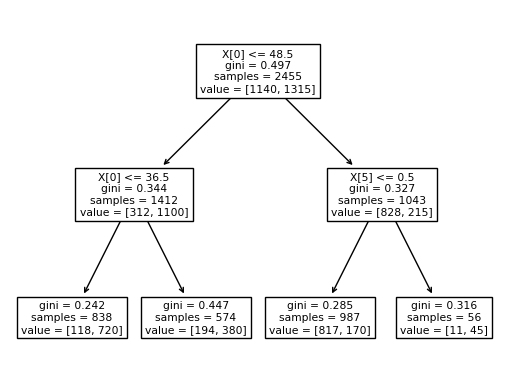

In [18]:
plot_tree(decision_tree=model_dt);

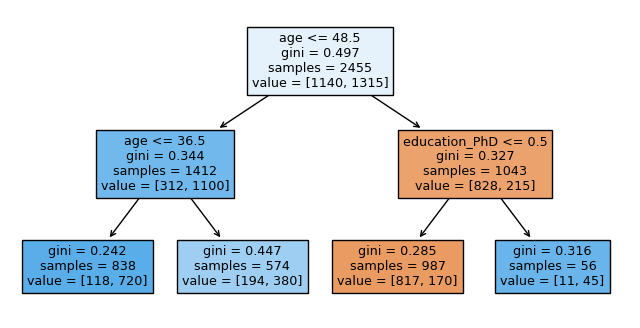

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plot_tree(decision_tree=model_dt, feature_names=features.columns, filled= True);

### Model Interpretation

In [20]:
model_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 2,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['age', 'sex_Male', 'education_High School',
        'education_Higher Level', 'education_No studies', 'education_PhD',
        'education_University'], dtype=object),
 'n_features_in_': 7,
 'n_outputs_': 1,
 'classes_': array([0, 1], dtype=int64),
 'n_classes_': 2,
 'max_features_': 7,
 'tree_': <sklearn.tree._tree.Tree at 0x2939f43b2d0>}

In [21]:
df_internet[8:9]

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
8,1,23,1,0,0,0,0,0


In [22]:
features[8:9]

,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
8,23,1,0,0,0,0,0


In [23]:
model_dt.predict_proba(X=features[8:9])

array([[0.14081146, 0.85918854]])

In [24]:
720/838

0.8591885441527446

In [31]:
comp = df_pred.internet_usage == df_pred.pred_dt

In [32]:
comp.mean()

0.7991853360488799

### Model's Score

In [25]:
model_dt.score(X=features, y=target)

0.7991853360488799

## Confusion Matrix

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [39]:
cm = confusion_matrix(y_true=df_internet.internet_usage, y_pred=df_pred.pred_dt)

In [42]:
CM = ConfusionMatrixDisplay(cm)

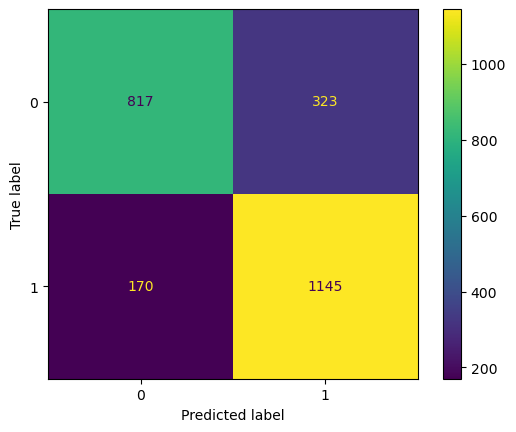

In [45]:
CM.plot();

### Sensitivity (Recall=1)

In [46]:
817/(817+323)

0.7166666666666667

### Specificity (Recall=0)

In [48]:
1145/(1145+170)

0.870722433460076

### Classification Report

In [49]:
from sklearn.metrics import classification_report

In [54]:
report = classification_report(y_true=df_internet.internet_usage, y_pred=df_pred.pred_dt, output_dict=True)

In [57]:
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.827761,0.779973,0.799185,0.803867,0.802164
recall,0.716667,0.870722,0.799185,0.793695,0.799185
f1-score,0.768218,0.822853,0.799185,0.795536,0.797483
support,1140.000000,1315.000000,0.799185,2455.000000,2455.000000


### ROC Curve

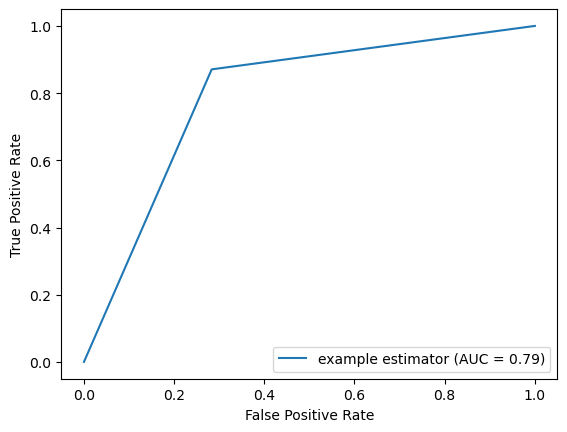

In [63]:
from sklearn import metrics 
y = df_pred.internet_usage
pred = df_pred.pred_dt
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()

plt.show()

## `RandomForestClassifier()` in Python

### Fit the Model

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model_rf = RandomForestClassifier()

In [66]:
model_rf.fit(X=features, y=target)

RandomForestClassifier()

### Calculate Predictions

In [67]:
model_rf.predict(X=features)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Model's Score

In [68]:
model_rf.score(X=features, y=target)

0.859877800407332

## `SVC()` in Python

### Fit the Model

In [80]:
from sklearn.svm import SVC

In [81]:
model_sv = SVC()

In [82]:
model_sv.fit(X=features, y=target)

SVC()

### Calculate Predictions

In [83]:
model_sv.predict(X=features)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Model's Score

In [84]:
model_sv.score(X=features, y=target)

0.7837067209775967

# Data Frame for All the Three Models

In [86]:
df_pred['pred_rf'] = model_rf.predict(X=features)
df_pred['pred_sv'] = model_sv.predict(X=features)
df_pred

,internet_usage,pred_probab_dt,pred_dt,pred_rf,pred_sv
0,0,0.172239,0,0,0
1,1,0.172239,0,0,0
2,1,0.662021,1,1,1
3,0,0.803571,1,1,0
4,1,0.662021,1,1,1
...,...,...,...,...,...
2450,1,0.662021,1,1,1
2451,1,0.859189,1,1,1
2452,0,0.172239,0,0,0
2453,1,0.859189,1,1,1


# ROC Curve for All The Three Models

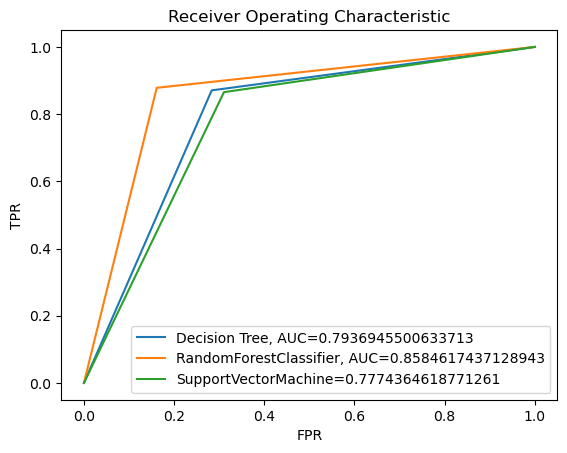

In [94]:
y = df_pred.internet_usage
pred = df_pred.pred_dt
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='DecisionTreeClassifier')
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(roc_auc))

y = df_pred.internet_usage
pred = df_pred.pred_rf
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RandomForestClassifier')
plt.plot(fpr,tpr,label="RandomForestClassifier, AUC="+str(roc_auc))

y = df_pred.internet_usage
pred = df_pred.pred_sv
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SupportVectorMachine')
plt.plot(fpr,tpr,label="SupportVectorMachine="+str(roc_auc))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

## Which One Is the Best Model? Why?

In [100]:
df_model_scores = pd.DataFrame()

df_model_scores['models'] = [model_dt, model_rf, model_sv]
df_model_scores

,models
0,DecisionTreeClassifier(max_depth=2)
1,"(DecisionTreeClassifier(max_features='sqrt', r..."
2,SVC()


In [101]:
df_model_scores['scores'] = [model_dt.score(X=features, y=target), model_rf.score(X=features, y=target), model_sv.score(X=features, y=target)]
df_model_scores

,models,scores
0,DecisionTreeClassifier(max_depth=2),0.799185
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.859878
2,SVC(),0.783707


In [102]:
df_model_scores.style.background_gradient()

,models,scores
0,DecisionTreeClassifier(max_depth=2),0.799185
1,RandomForestClassifier(),0.859878
2,SVC(),0.783707


## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Understand how **the Decision Tree Algorithm** is just counting observations to determine the outcome.
- [X] Another way to **compare real data with predictions** from the model.
- [X] Not all model visualizations are equal.
    - A tree was visualized instead of an `scatterplot()` to interpret the model.
- [ ] Distinguish **probability's role** to optimize this type of models.
- [X] Know how to determine **why a variable is important** in the model.
    - Why is it giving significant differences?
    - How does EDA helps us to see it?
- [X] Understand the process of the algorithm to determine if we need to **normalize/scale** the data.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.